###  My Keras experiment on Energy Efficiency dataset

In [1209]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.utils import shuffle

In [1210]:
file = pd.read_excel("file.xlsx",sheetname='sheet1')
file = shuffle(file)

#### Making categories for classification

In [1211]:
file['y1_category'] = file['Y1'].map(lambda x: 0 if (x>6.0) & (x<12) else (1 if((x>12) & (x<28))  else 2))
file['y1_good'] = file['Y1'].map(lambda x: 1 if (x>6) & (x<14.5) else 0)
file['y1_average'] = file['Y1'].map(lambda x: 1 if (x>14.5) & (x<28) else 0)
file['y1_bad'] = file['Y1'].map(lambda x: 1 if (x>28) & (x<44) else 0)

file['y2_category'] = file['Y2'].map(lambda x: 0 if (x>10.0) & (x<17.0) else (1 if((x>17.0) & (x<30.5))  else 2))
file['y2_good'] = file['Y2'].map(lambda x: 1 if (x>10.0) & (x<17.0) else 0)
file['y2_average'] = file['Y2'].map(lambda x: 1 if (x>17.0) & (x<30.5) else 0)
file['y2_bad'] = file['Y2'].map(lambda x: 1 if (x>30.5) & (x<49) else 0)


In [1212]:
file.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,y1_category,y1_good,y1_average,y1_bad,y2_category,y2_good,y2_average,y2_bad
315,0.74,686.0,245.0,220.5,3.5,5,0.25,1,12.45,15.50,1,1,0,0,0,1,0,0
461,0.71,710.5,269.5,220.5,3.5,3,0.25,4,12.49,15.09,1,1,0,0,0,1,0,0
123,0.74,686.0,245.0,220.5,3.5,5,0.10,2,10.45,13.79,0,1,0,0,0,1,0,0
16,0.79,637.0,343.0,147.0,7.0,2,0.00,0,28.52,37.73,2,0,0,1,2,0,0,1
659,0.69,735.0,294.0,220.5,3.5,5,0.40,3,14.08,17.02,1,1,0,0,1,0,1,0


In [1213]:
def accuracy(x):
    f_sum = 0
    d_sum = 0
    p,q = x.shape
    for i in range(p):
        for j in range(q):
            f_sum += x[i][j]
            if (i==j):
                d_sum += x[i][j]
    
    return d_sum/f_sum

In [1214]:
def neural_model(layers):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(8,)))
    if(layers>1):    
        model.add(Dense(100, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model
    

In [1215]:
def initial_parameters(batch,epochs):
    batch_size = batch
    #num_classes = 3
    epochs = epochs
    

In [1216]:
def compile_model(model): 
    model.compile(optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [1217]:
def fit_model(x,y,model):
    history = model.fit(x, y, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
          verbose=2)
    return history

### Splitting 70% data for training

In [1224]:
x_train_full = file.loc[:,'X1': 'X8']/file.loc[:,'X1':'X8'].max()
x_train = np.array(x_train_full[:int(0.7*len(x_train_full))])
y1_train_full = np.array(file.loc[:,'y1_good':'y1_bad'])
y1_train = np.array(y1_train_full[:int(0.7*len(y1_train_full))])
y2_train_full = np.array(file.loc[:,'y2_good':'y2_bad'])
y2_train = np.array(y2_train_full[:int(0.7*len(y2_train_full))])

### Splitting 30% data for testing

In [1225]:
x_test = np.array(x_train_full[(int(0.7*len(x_train_full))):])
y1_test_full = np.array(file['y1_category'])
y1_test = y1_test_full[int(0.7*len(y1_test_full)):]
y2_test_full = np.array(file['y2_category'])
y2_test = y2_test_full[int(0.7*len(y2_test_full)):]

### Model  for target variable Y1

In [1226]:
batch = 16
epochs = 20
initial_parameters(batch,epochs)

In [1228]:
layers = 10
history = []
test_acc = []
train_acc = []
for i in range(1,layers+1):
    model = neural_model(layers)
    compile_model(model)
    history = (fit_model(x_train,y1_train,model))
    #a,b = ret_accuracy(model,history,y1_test)
    #train_acc.append(a)
    #test_acc.append(b)
    
    

Train on 429 samples, validate on 108 samples
Epoch 1/20
1s - loss: 1.0240 - acc: 0.5198 - val_loss: 0.9741 - val_acc: 0.6296
Epoch 2/20
0s - loss: 0.8706 - acc: 0.6876 - val_loss: 0.8083 - val_acc: 0.6481
Epoch 3/20
0s - loss: 0.7240 - acc: 0.7016 - val_loss: 0.7006 - val_acc: 0.6389
Epoch 4/20
0s - loss: 0.6185 - acc: 0.7226 - val_loss: 0.6337 - val_acc: 0.6944
Epoch 5/20
0s - loss: 0.5572 - acc: 0.7459 - val_loss: 0.6343 - val_acc: 0.6667
Epoch 6/20
0s - loss: 0.5189 - acc: 0.7925 - val_loss: 0.5739 - val_acc: 0.7315
Epoch 7/20
0s - loss: 0.4945 - acc: 0.7995 - val_loss: 0.5619 - val_acc: 0.7037
Epoch 8/20
0s - loss: 0.4757 - acc: 0.7972 - val_loss: 0.5534 - val_acc: 0.7315
Epoch 9/20
0s - loss: 0.4638 - acc: 0.7902 - val_loss: 0.5408 - val_acc: 0.7407
Epoch 10/20
0s - loss: 0.4434 - acc: 0.7949 - val_loss: 0.5506 - val_acc: 0.7037
Epoch 11/20
0s - loss: 0.4473 - acc: 0.7902 - val_loss: 0.5327 - val_acc: 0.7407
Epoch 12/20
0s - loss: 0.4258 - acc: 0.8159 - val_loss: 0.5126 - val_acc

Train on 429 samples, validate on 108 samples
Epoch 1/20
0s - loss: 0.3789 - acc: 0.8205 - val_loss: 0.4275 - val_acc: 0.8333
Epoch 2/20
0s - loss: 0.3728 - acc: 0.8252 - val_loss: 0.3970 - val_acc: 0.8056
Epoch 3/20
0s - loss: 0.3702 - acc: 0.8322 - val_loss: 0.3837 - val_acc: 0.8241
Epoch 4/20
0s - loss: 0.3593 - acc: 0.8368 - val_loss: 0.3791 - val_acc: 0.8148
Epoch 5/20
0s - loss: 0.3580 - acc: 0.8462 - val_loss: 0.4031 - val_acc: 0.8241
Epoch 6/20
0s - loss: 0.3699 - acc: 0.8322 - val_loss: 0.4222 - val_acc: 0.8148
Epoch 7/20
0s - loss: 0.3504 - acc: 0.8322 - val_loss: 0.3937 - val_acc: 0.8241
Epoch 8/20
0s - loss: 0.3588 - acc: 0.8345 - val_loss: 0.3751 - val_acc: 0.7963
Epoch 9/20
0s - loss: 0.3486 - acc: 0.8462 - val_loss: 0.4328 - val_acc: 0.7870
Epoch 10/20
0s - loss: 0.3516 - acc: 0.8462 - val_loss: 0.3888 - val_acc: 0.8148
Epoch 11/20
0s - loss: 0.3508 - acc: 0.8415 - val_loss: 0.4151 - val_acc: 0.8241
Epoch 12/20
0s - loss: 0.3469 - acc: 0.8368 - val_loss: 0.3573 - val_acc

In [1229]:
y1_hat = model.predict_classes(x_test)

 32/231 [===>..........................] - ETA: 6s

In [1191]:
t1 = pd.crosstab(y1_hat,y1_test)

In [1192]:
t1

col_0,0,1,2
row_0,,,
0,31,46,0
1,0,51,12
2,0,11,80


In [1193]:
print(accuracy(t1))


0.701298701299


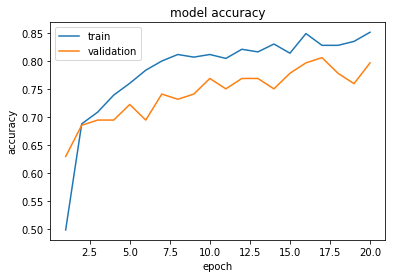

In [1230]:
x = np.arange(1,21)
plt.plot(x, history.history['acc'])
plt.plot(x, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Model for target variable Y2

In [1231]:
layers = 2
model = neural_model(layers)
compile_model(model)
history = fit_model(x_train,y2_train,model)

Train on 429 samples, validate on 108 samples
Epoch 1/20
1s - loss: 0.9819 - acc: 0.5804 - val_loss: 0.8984 - val_acc: 0.6296
Epoch 2/20
0s - loss: 0.8188 - acc: 0.6667 - val_loss: 0.7931 - val_acc: 0.6296
Epoch 3/20
0s - loss: 0.7064 - acc: 0.6760 - val_loss: 0.7682 - val_acc: 0.6296
Epoch 4/20
0s - loss: 0.6576 - acc: 0.6783 - val_loss: 0.6903 - val_acc: 0.6296
Epoch 5/20
0s - loss: 0.6162 - acc: 0.6760 - val_loss: 0.6622 - val_acc: 0.6481
Epoch 6/20
0s - loss: 0.5991 - acc: 0.6643 - val_loss: 0.7167 - val_acc: 0.6574
Epoch 7/20
0s - loss: 0.5827 - acc: 0.6900 - val_loss: 0.7135 - val_acc: 0.6574
Epoch 8/20
0s - loss: 0.5646 - acc: 0.7249 - val_loss: 0.6227 - val_acc: 0.7037
Epoch 9/20
0s - loss: 0.5646 - acc: 0.7226 - val_loss: 0.6193 - val_acc: 0.7037
Epoch 10/20
0s - loss: 0.5561 - acc: 0.7203 - val_loss: 0.6449 - val_acc: 0.6852
Epoch 11/20
0s - loss: 0.5495 - acc: 0.7086 - val_loss: 0.6136 - val_acc: 0.7500
Epoch 12/20
0s - loss: 0.5405 - acc: 0.7273 - val_loss: 0.6015 - val_acc

In [1232]:
y2_hat = model1.predict_classes(x_test)

 32/231 [===>..........................] - ETA: 0s

In [1233]:
t2 = pd.crosstab(y2_test,y2_hat)

In [1234]:
t2

col_0,0,1,2
row_0,,,
0,77,8,0
1,18,31,19
2,0,15,63


In [1235]:
print(accuracy(t2))

0.74025974026


### Epoch by epoch analysis (20 epochs considered)

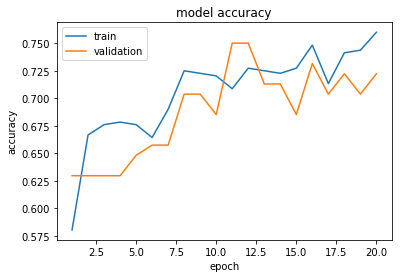

In [1236]:
x = np.arange(1,21)
plt.plot(x, history.history['acc'])
plt.plot(x, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()